<a href="https://colab.research.google.com/github/Spandana365/3_Bias-Busters/blob/main/biased_log_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# gender_bias_hiring (1).csv


# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Upload the dataset to Google Colab
from google.colab import files
uploaded = files.upload()

# Load the dataset
df = pd.read_csv('gender_bias_hiring (1).csv')

Saving gender_bias_hiring (1).csv to gender_bias_hiring (1).csv


In [2]:
# Convert 'Skills' column into a numerical feature (e.g., count of skills)
df['Skills'] = df['Skills'].apply(lambda x: len(x.strip("[]").split(',')))

# Convert 'Gender' into numerical values (0 for Male, 1 for Female)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Convert 'Recruiter Decision' into numerical values (0 for Not Hired, 1 for Hired)
df['Recruiter Decision'] = df['Recruiter Decision'].map({'Not Hired': 0, 'Hired': 1})

# Define features (X) and target (y)
X = df[['Gender', 'Experience', 'Skills', 'Education', 'Certification', 'Job Role', 'Salary Expectation', 'Project Count', 'AI Score']]
y = df['Recruiter Decision']

# Convert categorical features into numerical ones
# For simplicity, let's assume 'Education', 'Certification', and 'Job Role' are categorical
education_map = {'Master\'s': 2, 'PhD': 3, 'Bachelor\'s': 1}
certification_map = {'None': 0, 'PMP': 1, 'Certified Data Scientist': 2, 'AWS Certified': 3, 'Google Cloud Certified': 4}
job_role_map = {'Project Manager': 1, 'Cloud Architect': 2, 'Data Scientist': 3, 'Software Engineer': 4}

df['Education'] = df['Education'].map(education_map)
df['Certification'] = df['Certification'].map(certification_map)
df['Job Role'] = df['Job Role'].map(job_role_map)

In [3]:
print(df.dtypes)

Name                   object
Resume ID              object
Skills                  int64
Experience              int64
Education               int64
Certification         float64
Job Role                int64
Recruiter Decision      int64
Salary Expectation      int64
Project Count           int64
AI Score                int64
Gender                  int64
dtype: object


In [4]:
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.preprocessing import StandardScaler # Import the scaler
import numpy as np

In [5]:
# Define features (X) and target (y)
X = df[['Gender', 'Experience', 'Skills', 'Education', 'Certification', 'Job Role', 'Salary Expectation', 'Project Count']]
y = df['Recruiter Decision']

# Impute missing values
imputer_num = SimpleImputer(strategy='mean')
imputer_cat = SimpleImputer(strategy='most_frequent')

# Use .loc to avoid SettingWithCopyWarning
X.loc[:, ['Experience', 'Skills', 'Salary Expectation', 'Project Count']] = imputer_num.fit_transform(X[['Experience', 'Skills', 'Salary Expectation', 'Project Count']])
X.loc[:, ['Education', 'Certification', 'Job Role']] = imputer_cat.fit_transform(X[['Education', 'Certification', 'Job Role']])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Apply Standard Scaling to all numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit & transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data


# Convert back to DataFrame
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)
'''
# ⬇️ APPLY CUSTOM WEIGHTING ⬇️
X_train['Gender'] *= 2  # Increase the weight of Gender
X_train['Skills'] *= 7  # Normal weight
X_train['Experience'] *= 8  # Normal weight
X_train['Project Count'] *= 7  # Normal weight
X_train['Education'] *= 6  # Increase the weight of Education
X_train['Certification'] *= 5  # Normal weight
X_train['Job Role'] *= 6  # Normal weight
X_train['Salary Expectation'] *= 5  # Normal weight

X_test['Gender'] *= 2
X_test['Skills'] *= 7
X_test['Experience'] *= 8
X_test['Project Count'] *= 7
X_test['Education'] *= 6
X_test['Certification'] *= 5
X_test['Job Role'] *= 6
X_test['Salary Expectation'] *= 5
'''
# Create and train a logistic regression model
model = LogisticRegression(max_iter=2000, solver='liblinear', class_weight='balanced')

model.fit(X_train, y_train)

# Predict on test data
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy:", accuracy)

new_candidate = pd.DataFrame([{
    'Gender': 0,  # Example: Male = 1, Female = 0
    'Experience': 5,  # 5 years
    'Skills': 7,  # Assume skill rating 1-10
    'Education': 3,  # Example: 3 could be Bachelor's
    'Certification': 2,  # Number of certifications
    'Job Role': 4,  # Encoded Job Role
    'Salary Expectation': 50000,  # Example salary expectation
    'Project Count': 3  # Number of projects completed
}])

# Similarly, define `new_candidate_female`
new_candidate_female = pd.DataFrame([{
    'Gender': 1,  # Female
    'Experience': 5,
    'Skills': 7,
    'Education': 3,
    'Certification': 2,
    'Job Role': 4,
    'Salary Expectation': 50000,
    'Project Count': 3
}])

new_candidate_scaled = scaler.transform(new_candidate)
new_candidate_scaled = pd.DataFrame(new_candidate_scaled, columns=X_train.columns)

new_candidate_scaled['Gender'] *= 2
new_candidate_scaled['Skills'] *= 7
new_candidate_scaled['Experience'] *= 8
new_candidate_scaled['Project Count'] *= 7
new_candidate_scaled['Education'] *= 6
new_candidate_scaled['Certification'] *= 5
new_candidate_scaled['Job Role'] *= 6
new_candidate_scaled['Salary Expectation'] *= 5

new_candidate_prediction = model.predict(new_candidate_scaled)
print("New Candidate Prediction:", new_candidate_prediction)


new_candidate_female_scaled = scaler.transform(new_candidate_female)
new_candidate_female_scaled = pd.DataFrame(new_candidate_female_scaled, columns=X_train.columns)

new_candidate_female_scaled['Gender'] *= 2
new_candidate_female_scaled['Skills'] *= 7
new_candidate_female_scaled['Experience'] *= 8
new_candidate_female_scaled['Project Count'] *= 7
new_candidate_female_scaled['Education'] *= 6
new_candidate_female_scaled['Certification'] *= 5
new_candidate_female_scaled['Job Role'] *= 6
new_candidate_female_scaled['Salary Expectation'] *= 5

new_candidate_female_prediction = model.predict(new_candidate_female_scaled)
print("New Candidate Female Prediction:", new_candidate_female_prediction)


Model Accuracy: 0.59
New Candidate Prediction: [1]
New Candidate Female Prediction: [0]


In [6]:
!pip install shap matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [ ]:
print(df.dtypes)

Name                   object
Resume ID              object
Skills                  int64
Experience              int64
Education               int64
Certification         float64
Job Role                int64
Recruiter Decision      int64
Salary Expectation      int64
Project Count           int64
AI Score                int64
Gender                  int64
dtype: object


In [7]:
feature_importance = np.abs(model.coef_).flatten()
sorted_features = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance}).sort_values(by="Importance", ascending=False)
print(sorted_features)


              Feature  Importance
0              Gender    0.474671
3           Education    0.070889
7       Project Count    0.068609
2              Skills    0.057644
6  Salary Expectation    0.047126
1          Experience    0.021353
5            Job Role    0.010634
4       Certification    0.007383


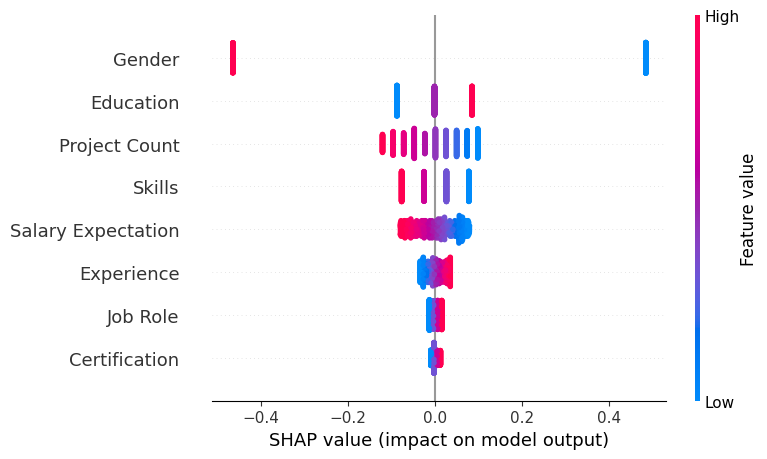

'\n# SHAP analysis\nexplainer = shap.Explainer(log_reg, X_train)\nshap_values = explainer(X_train)\n\n# Plot SHAP summary with proper feature names\nshap.summary_plot(shap_values, X_train, feature_names=X_train.columns)\n'

In [8]:
'''
# If X_train is a NumPy array, convert it back to a DataFrame with proper column names
if isinstance(X_train, np.ndarray):
    feature_names = ['Gender', 'Experience', 'Skills', 'Education', 'Certification', 'Job Role', 'Salary Expectation', 'Project Count']  # Replace with actual feature names
    X_train = pd.DataFrame(X_train, columns=feature_names)
'''
'''
# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
'''

# Train SHAP Explainer on the final trained model
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer(X_train)

# Plot SHAP summary with correct feature names
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns)

'''
# SHAP analysis
explainer = shap.Explainer(log_reg, X_train)
shap_values = explainer(X_train)

# Plot SHAP summary with proper feature names
shap.summary_plot(shap_values, X_train, feature_names=X_train.columns)
'''


In [9]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=46f2579b1ae46148921a81d2a48b606790944a7f62556be4f6170c76901b5df3
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


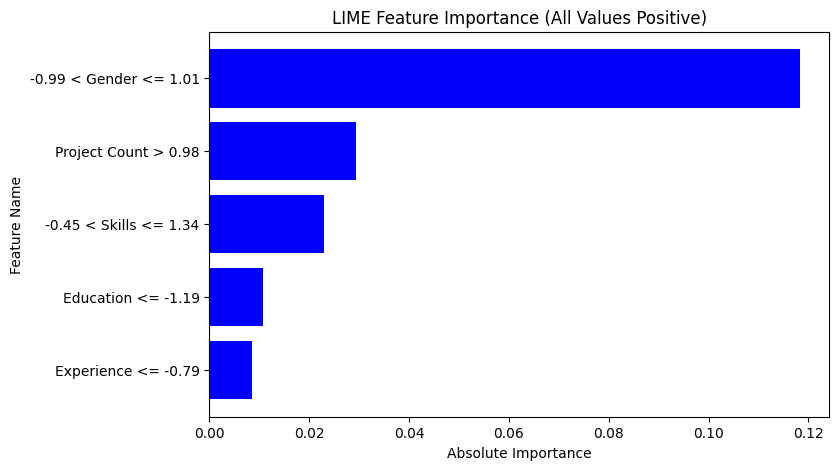

In [10]:
import lime
import lime.lime_tabular
import numpy as np
import matplotlib.pyplot as plt

# Ensure LIME gets the weighted features
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,  # Ensure it's NumPy for LIME
    feature_names=X_train.columns.tolist(),
    class_names=['Not Hired', 'Hired'],
    mode='classification'
)

# Pick a test candidate
idx = np.random.randint(0, X_test.shape[0])  # Select a random test sample

# Generate LIME explanation for one instance
exp = explainer.explain_instance(
    X_test.iloc[idx].values,  # Use weighted X_test
    model.predict_proba,
    num_features=5  # Show top 5 influential features
)

# Extract feature importance values and take absolute values
feature_importance = exp.as_list()
feature_names, importance_values = zip(*feature_importance)

# Convert all values to absolute
importance_values = np.abs(importance_values)

# Plot manually to ensure all values are positive
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importance_values, color='blue')
plt.xlabel("Absolute Importance")
plt.ylabel("Feature Name")
plt.title("LIME Feature Importance (All Values Positive)")
plt.gca().invert_yaxis()  # Keep the most important feature on top
plt.show()


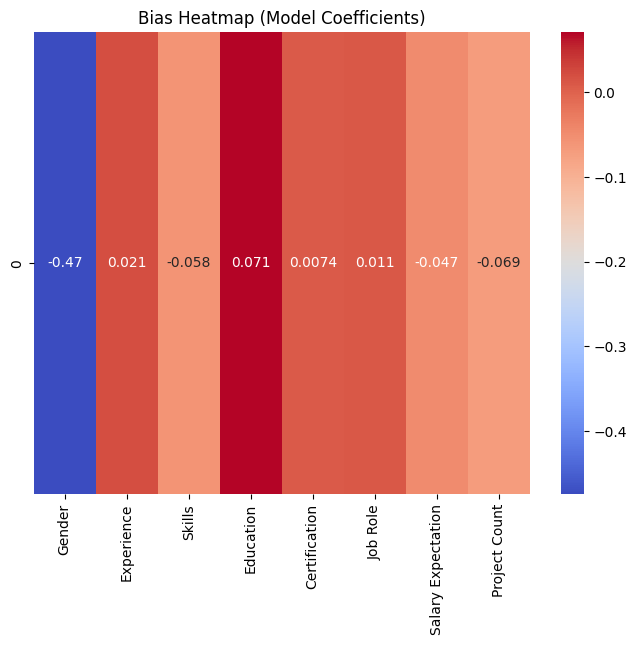

In [11]:

# Bias Heatmap
coefficients = model.coef_[0]
feature_importance = pd.Series(coefficients, index=X.columns)
plt.figure(figsize=(8, 6))
sns.heatmap(feature_importance.to_frame().T, cmap='coolwarm', annot=True)
plt.title('Bias Heatmap (Model Coefficients)')
plt.show()

In [ ]:
import pandas as pd
X_test = pd.DataFrame(X_test, columns=feature_names)  # Ensure DataFrame


In [ ]:
print(X_test.columns)  # Ensure 'Gender' is a valid column name


Index(['Gender', 'Experience', 'Skills', 'Education', 'Certification',
       'Job Role', 'Salary Expectation', 'Project Count'],
      dtype='object')


In [ ]:
print(X_test['Gender'].unique())  # Check actual values in Gender column


[-1.98009901  2.02010101]


In [12]:
# Bias Score Function (Updated)
def calculate_bias_score(model, X, feature_name):
    """
    Computes bias score based on different groups in a given feature.

    Parameters:
    model: Trained model
    X: Feature DataFrame
    feature_name: Column name to analyze bias

    Returns:
    Bias score between the two groups.
    """
    unique_values = X[feature_name].unique()

    if len(unique_values) < 2:
        raise ValueError(f"Feature {feature_name} does not have enough unique values to calculate bias.")

    privileged_value = min(unique_values)  # Pick min value as privileged
    unprivileged_value = max(unique_values)  # Pick max value as unprivileged

    privileged = X[X[feature_name] == privileged_value]
    unprivileged = X[X[feature_name] == unprivileged_value]

    if privileged.empty or unprivileged.empty:
        raise ValueError(f"No samples found for privileged ({privileged_value}) or unprivileged ({unprivileged_value}) group.")

    privileged_pred = model.predict(privileged)
    unprivileged_pred = model.predict(unprivileged)

    bias_score = abs(np.mean(privileged_pred) - np.mean(unprivileged_pred))
    return bias_score

# Compute Bias Score for Gender
bias_score_gender = calculate_bias_score(model, X_test, 'Gender')
print(f'Bias Score (Gender): {bias_score_gender}')

Bias Score (Gender): 1.0
